In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_56217_U')

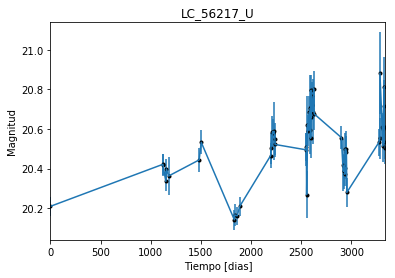

In [2]:
data = np.genfromtxt('LC_56217_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_56217_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

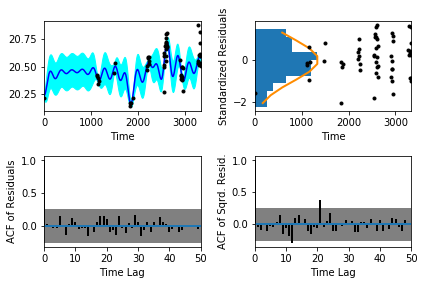

In [5]:
sample.assess_fit()

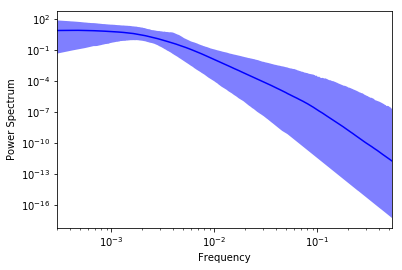

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_56217_U')

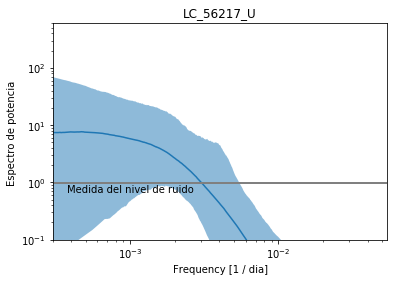

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_56217_U')

Text(0.5,1,'Prediccion , valor esperado LC_56217_U')

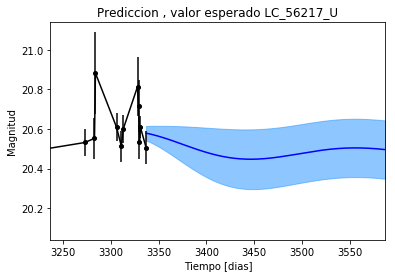

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_56217_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_56217_U')

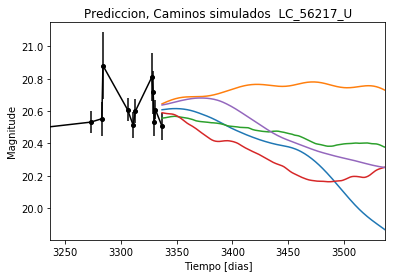

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_56217_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_56217_U')

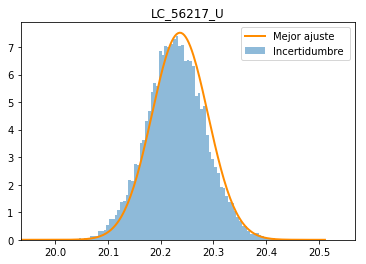

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_56217_U')

Text(0.5,1,'Interpolacion, camino simulado LC_56217_U')

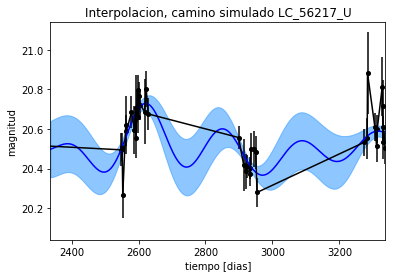

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56217_U')

Text(0.5,1,'Interpolacion, camino simulado LC_56217_U')

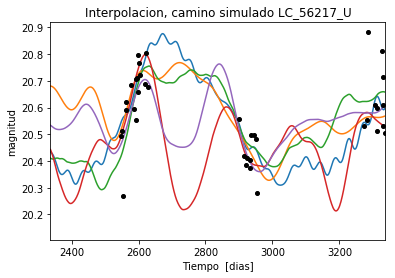

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56217_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 334.176486028
Median: 0.003940169315
Standard deviation: 0.164680579846
68% credibility interval: [ 0.00067707  0.08834604]
95% credibility interval: [  3.53975155e-04   6.65678363e-01]
99% credibility interval: [  3.04370009e-04   9.62671499e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1297.18607646
Median: 0.00155536034086
Standard deviation: 0.0727839009422
68% credibility interval: [ 0.0005439   0.01800719]
95% credibility interval: [ 0.00033199  0.21599708]
99% credibility interval: [  3.03637744e-04   5.36621677e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 362.178638485
Median: 0.0082212112333
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1415.47846691
Median: 77.7382239379
Standard deviation: 1.63884506001
68% credibility interval: [ 75.89999344  78.93149569]
95% credibility interval: [ 73.35527604  79.60957413]
99% credibility interval: [ 71.44502928  79.91308259]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 596.508592508
Median: 0.357348872675
Standard deviation: 1.89195168031
68% credibility interval: [ 0.03992658  2.83042011]
95% credibility interval: [ 0.01369209  6.56982656]
99% credibility interval: [ 0.00995994  9.64436802]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 507.231256582
Median: 0.110668769486
Standard deviation: 8.06466977435
68% credibility interval: [  2.53311208e-03   4.21872585e+00]
95% credibility interval: [  5.7

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 16762.7584521
Median: 1.76827441315e-32
Standard deviation: 3.17743684852e+132
68% credibility interval: [  2.71482349e-89   1.05644001e+55]
95% credibility interval: [  3.96379353e-150   1.68874811e+104]
99% credibility interval: [  2.39027544e-172   4.94625035e+118]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2535.21560114
Median: 20.4314206594
Standard deviation: 0.0768466791698
68% credibility interval: [ 20.36567452  20.49021342]
95% credibility interval: [ 20.27324629  20.57834434]
99% credibility interval: [ 20.16739603  20.68725678]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 510.786910443
Median: 0.00325999902111
Standard deviation: 0.22578378286
68% credibility interval: [ 0.          0.23766214]
95% credibility interval: [ 0.          0.84824283]
99% credibility interval: [ 0.          1.00547162]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 510.786910443
Median: 0.00325999902111
Standard deviation: 0.22578378286
68% credibility interval: [ 0.          0.23766214]
95% credibility interval: [ 0.          0.84824283]
99% credibility interval: [ 0.          1.00547162]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 754.682874051
Median: 0.0
Standard deviation: 0.00093802018522
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1415.47846691
Median: 77.7382239379
Standard deviation: 1.63884506001
68% credibility interval: [ 75.89999344  78.93149569]
95% credibility interval: [ 73.35527604  79.60957413]
99% credibility interval: [ 71.44502928  79.91308259]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1704.74367858
Median: 0.034909981101
Standard deviation: 0.0379027260463
68% credibility interval: [ 0.02068941  0.06412471]
95% credibility interval: [ 0.01359675  0.13270978]
99% credibility interval: [ 0.01066198  0.23843871]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1873.57171761
Median: 0.886061430123
Standard deviation: 0.137020990587
68% credibility interval: [ 0.76756638  1.03178469]
95% credibility interval: [ 0.66838542  1.20666972]
99% credibility interval: [ 0.60470998  1.34056678]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1398.36399921
Median: 2.87005119974e-05
Standard deviation: 0.0691113259217
68% credibility interval: [  3.52472440e-60   2.85530337e-03]
95% credibility interval: [  1.04783850e-108   3.39118155e-002]
99% credibility interval: [  3.61362673e-124   2.36353916e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 334.176486028
Median: (-0.0247568139478-0.0278158709122j)
Standard deviation: 1.75590029674
68% credibility interval: [-0.55509455+0.j         -0.00425415-0.00838029j]
95% credibility interval: [ -4.18258051e+00-4.80011662j  -2.22409150e-03-0.3262683j ]
99% credibility interval: [ -6.04864342e+00+0.j          -1.91241317e-03-0.00290821j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1297.18607646
Median: (-0.00977261724108+1.20378258189j)
Standard deviation: 1.49053012055
68% credibility interval: [-0.11314249+0.74804196j -0.00341745+0.00334079j]
95% credibility interval: [-1.35714965+2.15424611j -0.00208597+0.49706865j]
99% credibility interval: [ -3.37169343e+00+2.37207776j  -1.90781221e-03+0.01070446j]
Posterior s